In [29]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import yfinance as yf

In [45]:
fecha_fin_calculo = (datetime.now() - timedelta(days= 1)).strftime('%Y-%m-%d')
fecha_inicio_calculo = '2024-07-15'


spy = yf.download('SPY', start=fecha_inicio_calculo, end=fecha_fin_calculo)
sh = yf.download('sh', start=fecha_inicio_calculo, end=fecha_fin_calculo)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [46]:
spy_ret = spy.pct_change()
spy_ret.dropna(inplace=True)
sh_ret = sh.pct_change()
sh_ret.dropna(inplace = True)
sh_ret = sh_ret * -1

In [47]:
initial_price = 100 
spy_ret['Price_SPY']= initial_price * (1 + spy_ret['Adj Close']).cumprod()
sh_ret['Price_SH']= initial_price * (1 + sh_ret['Adj Close']).cumprod()


In [49]:
sh_ret

,Open,High,Low,Close,Adj Close,Volume,Price_SH
Date,,,,,,,
2024-07-16,0.000903,0.004488,-0.000000,0.006301,0.006301,0.231785,100.630060
2024-07-17,-0.007227,-0.009919,-0.008160,-0.014493,-0.014493,-0.301901,99.171655
2024-07-18,-0.000897,-0.011607,-0.001799,-0.007143,-0.007143,-0.633146,98.463287
2024-07-19,-0.012545,-0.005296,-0.011670,-0.007979,-0.007979,0.416970,97.677674
2024-07-22,0.001770,0.005268,0.002662,0.009675,0.009675,-0.001051,98.622662
2024-07-23,0.001773,0.003530,0.002669,-0.000888,-0.000888,0.110300,98.535073
2024-07-24,-0.009769,-0.023029,-0.014273,-0.023957,-0.023957,-0.272499,96.174432
2024-07-25,-0.014952,-0.006061,-0.002638,-0.004333,-0.004333,-0.904080,95.757731
2024-07-26,0.002600,0.006885,-0.000877,0.009491,0.009491,0.249663,96.666566


In [50]:
trainset=np.arange(0, 30)
testset=np.arange(trainset.shape[0], spy_ret.shape[0])
model=sm.OLS(spy_ret.loc[:, 'Price_SPY'].iloc[trainset], sh_ret.loc[:, 'Price_SH'].iloc[trainset])

In [51]:
results=model.fit()
hedgeRatio=results.params
hedgeRatio

Price_SH    1.0048
dtype: float64

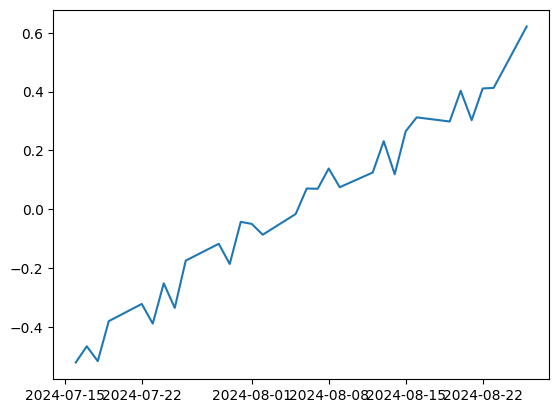

In [52]:
spread=spy_ret.loc[:, 'Price_SPY']-hedgeRatio[0]*sh_ret.loc[:, 'Price_SH']
plt.plot(spread.iloc[trainset])

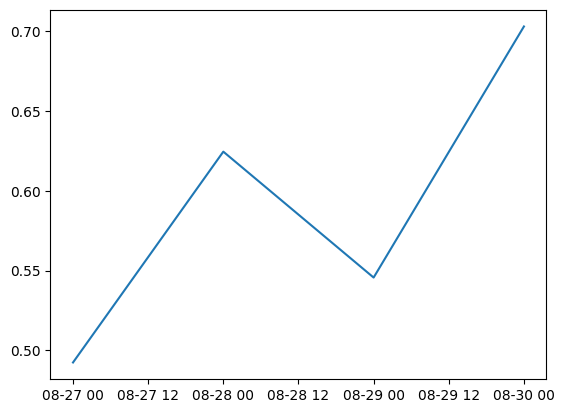

In [53]:
plt.plot(spread.iloc[testset])